# Ising 2D 
## Simulaciones Montecarlo , Algoritmo de Metropolis

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

###   Definimos los parámetros del sistema

In [10]:
L = 50  # Tamaño del sistema (LxL)
J = 1  # Energía de interacción entre espines
T = 1.7  # Temperatura
num_pasos = 20000

In [11]:
def calcular_energia(spins):
    energia = 0
    for i in range(L):
        for j in range(L):
            energia += -J * spins[i, j] * (spins[(i + 1) % L, j] +spins[(i - 1) % L, j]+ spins[i, (j + 1) % L]+spins[i, (j - 1) % L])
    return energia

In [12]:
def metropolis(spins, temperatura):
    i, j = random.randint(0, L - 1), random.randint(0, L - 1)
    delta_energia = 2 * J * spins[i, j] * (spins[(i + 1) % L, j] + spins[(i - 1) % L, j] +
                                           spins[i, (j + 1) % L] + spins[i, (j - 1) % L])
    if delta_energia < 0 or random.random() < np.exp(-delta_energia / temperatura):
        spins[i, j] *= -1

In [13]:
def mag(T):
    if T > 2/np.log(1+np.sqrt(2)):
        return(0)
    else:
        return((1-(np.sinh(2/T))**(-4))**(1/8))

In [14]:
def calcular_magnetizacion(spins):
    return np.sum(spins) / (L * L)

In [15]:
#spins = np.random.choice([-1, 1], size=(L, L))
spins = np.ones((L, L))
magnetizacion = []
energias = []

In [16]:
for paso in range(num_pasos):
    metropolis(spins, T)
    energia = calcular_energia(spins)
    energias.append(energia)
    magnetizacion1 = calcular_magnetizacion(spins)
    magnetizacion.append(magnetizacion1)

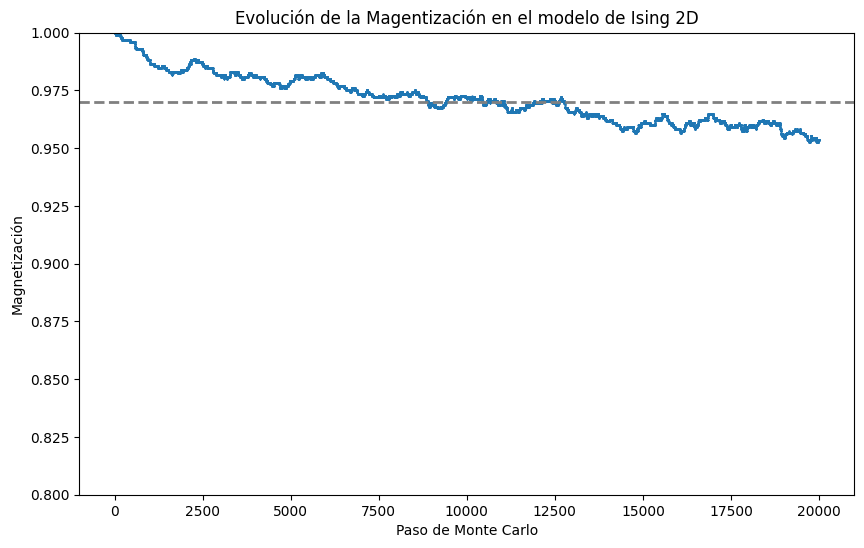

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(magnetizacion,'*',markersize=1)
plt.xlabel('Paso de Monte Carlo')
plt.ylabel('Magnetización')
plt.ylim([0.8,1.0])
plt.axhline(mag(T), color='grey',linestyle='--',linewidth=2)
plt.title('Evolución de la Magentización en el modelo de Ising 2D')
plt.show()

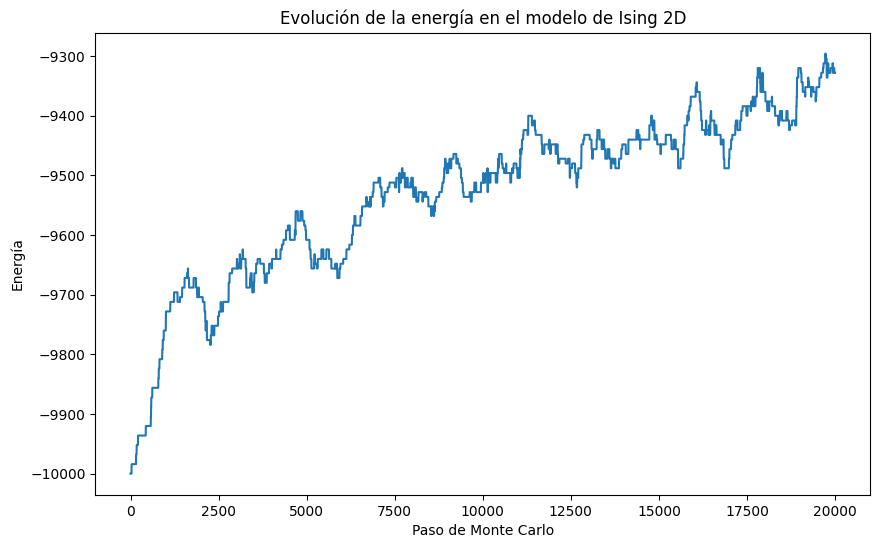

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(energias)
plt.xlabel('Paso de Monte Carlo')
plt.ylabel('Energía')
plt.title('Evolución de la energía en el modelo de Ising 2D')
plt.show()